# Analyse de la symétrie du cristal RbLaS2

In [1]:
# Anatole Moureaux
# 29 Feb 2020

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import *
from pymatgen.io.cif import *
from pymatgen.core.operations import *
from tabulate import tabulate
from pymatgen.symmetry.site_symmetries import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Téléchargement du fichier CIF symmetrized

In [2]:
#mission 4
print("Téléchargement du fichier CIF...")
structure = MPRester("H45GsyS7rpfkZzFI").get_structure_by_material_id("mp-9361")
CifWriter(structure,0.1, write_magmoms=False).write_file("RbLaS2_mp-9361_symmetrized.cif")
print("Téléchargement terminé !")

Téléchargement du fichier CIF...
Téléchargement terminé !


## Analyse de 3 éléments de symétrie sur 3 atomes différents

On commence par définir 3 opérations de symétries. Celles-ci ont été trouvées dans le fichier CIF téléchargé ci-dessus. On les instancie à l'aide du package $SymmOp$ et de leur représentation sous forme de texte.

In [3]:
#mission 6
#liste des éléments de symétrie
customSym1 = SymmOp.from_xyz_string('-x, -y, -z')#2
customSym2 = SymmOp.from_xyz_string('y, x, -z')#7
customSym3 = SymmOp.from_xyz_string('x, x-y, z')#12

On définit également 3 atomes différents représentés par leur coordonnées dans la maille dans la maille conventionnelle.

In [4]:
#3 différents atomes : 
Rb0 = [0.0,0.0,0.0]
La1 = [0.0,0.0,0.5]
S2 = [0.0,0.0,0.23]

On applique ensuite sur chaque atome défini ci-dessus une des 3 opérations de symétries préalablement définies.

In [5]:
#application des opérations
Rb0res = customSym1.operate(Rb0)
La1res = customSym2.operate(La1)
S2res = customSym3.operate(S2)

In [6]:
#affichage des résultats
print("\n")
print(tabulate([
	["("+str(customSym1.as_xyz_string()+")"),str(Rb0),str(Rb0res)],
	["----------------------------------","",""],
	[customSym1,"",""],
	["----------------------------------","-----------------","----------------------------------"],
	["("+str(customSym2.as_xyz_string()+")"),str(La1),str(La1res)],
	["----------------------------------","",""],	
	[customSym2,"",""],
	["----------------------------------","-----------------","----------------------------------"],
	["("+str(customSym3.as_xyz_string()+")"),str(S2),str(S2res)],
	["----------------------------------","",""],	
	[customSym3,"",""],
	["----------------------------------","-----------------","----------------------------------"]],
	headers=["Opération de symétrie","Atome de départ","Atome d'arrivée"]))
print("\n")



Opération de symétrie               Atome de départ    Atome d'arrivée
----------------------------------  -----------------  ----------------------------------
(-x, -y, -z)                        [0.0, 0.0, 0.0]    [0. 0. 0.]
----------------------------------
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------  -----------------  ----------------------------------
(y, x, -z)                          [0.0, 0.0, 0.5]    [ 0.   0.  -0.5]
----------------------------------
Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------  -----------------  ----------------------------------
(x, x-y, z)                         [0.0, 0.0, 0.23]   [0.   0.   0.23]
----------------------------------
Rot:
[[ 1.  0.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
----------------------------------  -----------------  ----------------------------------







### Première opération de symétrie

La première opération $\begin{pmatrix}-x&-y&-z\end{pmatrix}$ est définie par une matrice de rotation <div align="center">$\begin{pmatrix}-1&0&0\\0&-1&0\\0&0&-1\end{pmatrix}$ et une translation nulle. 
    
Il s'agit de l'inversion autour du point $\begin{pmatrix}0&0&0\end{pmatrix}$.    

Comme on choisit de l'opérer sur l'atome Rb situé en $\begin{pmatrix}0&0&0\end{pmatrix}$, l'atome issu de l'opération reste identique à celui de départ.

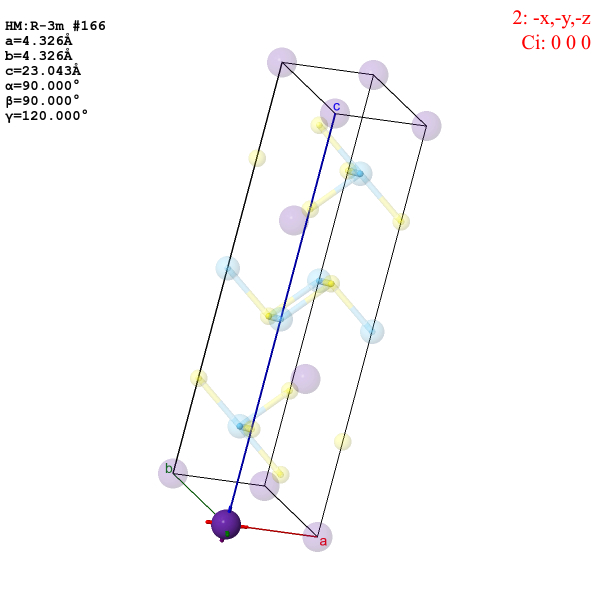




### Seconde opération de symétrie

La seconde opération $\begin{pmatrix}y&x&-z\end{pmatrix}$ est définie par une matrice de rotation <div align="center">$\begin{pmatrix}0&1&0\\1&0&0\\0&0&-1\end{pmatrix}$ et une translation nulle. 
    
Il s'agit d'une rotation d'ordre 2 autour de l'axe $\begin{bmatrix}1&1&0\end{bmatrix}$.  
    
Comme on choisit de l'opérer sur l'atome La situé en $\begin{pmatrix}0&0&0.5\end{pmatrix}$, l'atome issu de l'opération se retrouve en $\begin{pmatrix}0&0&-0.5\end{pmatrix}$.

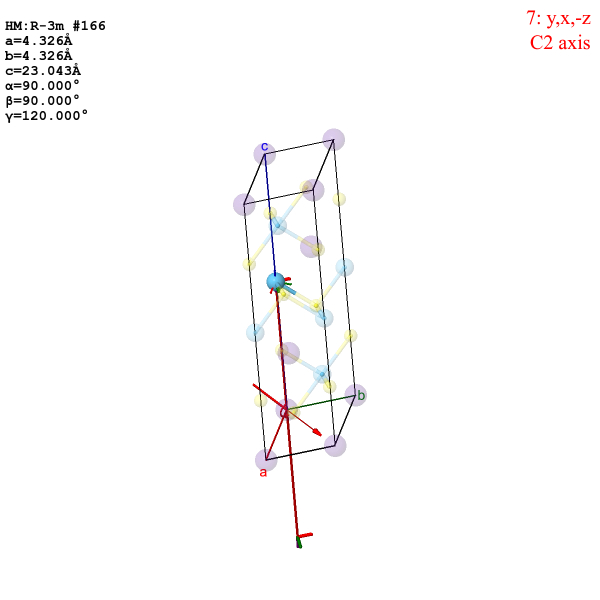




### Troisième opération de symétrie

La dernière opération $\begin{pmatrix}x&x-y&z\end{pmatrix}$ est définie par une matrice de rotation <div align="center">$\begin{pmatrix}1&0&0\\1&-1&0\\0&0&1\end{pmatrix}$ et une translation nulle. 
    
Il s'agit d'une symétrie par plan miroir perpendiculaire à la direction $\begin{bmatrix}0&1&0\end{bmatrix}$.    
    
Comme on choisit de l'opérer sur l'atome S situé en $\begin{pmatrix}0&0&0.23\end{pmatrix}$, l'atome issu de l'opération reste identique à celui de départ.

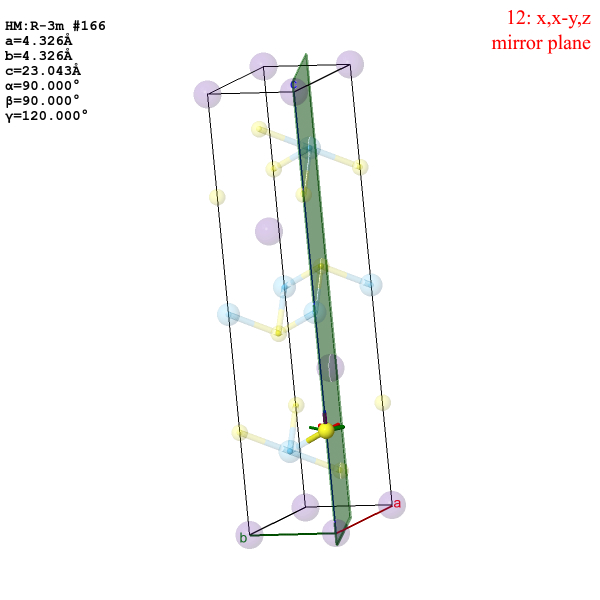